In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
# One-Hot Encoding
# Creating a sample dataset with a categorical variable
data = {'color': ['red', 'green', 'blue', 'red', 'green']}
df = pd.DataFrame(data)
df['color']

0      red
1    green
2     blue
3      red
4    green
Name: color, dtype: object

In [28]:
# Performing One-Hot Encoding
one_hot_encoded = pd.get_dummies(df['color'],prefix='color')
# combining the encoded data with original data
df = pd.concat([df,one_hot_encoded],axis=1)
# remove the color column
df = df.drop('color',axis=1)
print(df)

   color_blue  color_green  color_red
0       False        False       True
1       False         True      False
2        True        False      False
3       False        False       True
4       False         True      False


,color_blue,color_green,color_red,color_blue,color_green,color_red
0,False,False,True,False,False,True
1,False,True,False,False,True,False
2,True,False,False,True,False,False
3,False,False,True,False,False,True
4,False,True,False,False,True,False


# Label Encoding

In [2]:
from sklearn.preprocessing import LabelEncoder
# create a sample dataset with a categorical variable
data = ['small', 'medium', 'large', 'small', 'large']
label_encoder = LabelEncoder()
encoded_data = label_encoder.fit_transform(data)
print(encoded_data)

[2 1 0 2 0]


# Understanding The Data

In [21]:
df = pd.read_csv('data2.csv')
df.head()

,Unnamed: 0,Duration,Date,Pulse,Maxpulse,Calories
0,0,60,2020/12/01,110,130,409.1
1,1,60,2020/12/02,117,145,479.0
2,2,60,2020/12/03,103,135,340.0
3,3,45,2020/12/04,109,175,282.4
4,4,45,2020/12/05,117,148,406.0


In [22]:
## get the shape of the data
df.shape

(32, 6)

In [23]:
## get the data types
df.dtypes

Unnamed: 0      int64
Duration        int64
Date           object
Pulse           int64
Maxpulse        int64
Calories      float64
dtype: object

In [24]:
## remove columns
df = df.drop(columns=['Unnamed: 0','Date'])
df.head()

,Duration,Pulse,Maxpulse,Calories
0,60,110,130,409.1
1,60,117,145,479.0
2,60,103,135,340.0
3,45,109,175,282.4
4,45,117,148,406.0


# Data Transformation

In [7]:
# scaling
df = pd.read_csv('pima_indians_dataset.csv')
from sklearn import preprocessing
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,12,196,97,43,579,48.9,2.329,62,1
1,15,78,50,72,305,47.9,2.074,38,0
2,0,135,121,14,156,47.5,0.681,36,0
3,3,123,44,79,32,18.2,0.297,46,1
4,3,186,44,86,814,36.8,2.379,57,1


In [36]:
df = df.drop(columns=['DiabetesPedigreeFunction'])
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age,Outcome
0,12,196,97,43,579,48.9,62,1
1,15,78,50,72,305,47.9,38,0
2,0,135,121,14,156,47.5,36,0
3,3,123,44,79,32,18.2,46,1
4,3,186,44,86,814,36.8,57,1


In [37]:
values_array = df.values
values_array

array([[ 12. , 196. ,  97. , ...,  48.9,  62. ,   1. ],
       [ 15. ,  78. ,  50. , ...,  47.9,  38. ,   0. ],
       [  0. , 135. , 121. , ...,  47.5,  36. ,   0. ],
       ...,
       [ 16. , 105. ,  86. , ...,  36.1,  54. ,   0. ],
       [  7. , 175. , 108. , ...,  24.9,  71. ,   0. ],
       [  1. ,  93. ,  75. , ...,  38. ,  45. ,   0. ]])

In [40]:
# rescale data between 0 to 1
data_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
data_rescale = data_scaler.fit_transform(values_array)
data_rescale

array([[0.75      , 0.97986577, 0.73626374, 0.375     , 0.67951807,
        0.96551724, 0.69491525, 1.        ],
       [0.9375    , 0.18791946, 0.21978022, 0.70454545, 0.34939759,
        0.93416928, 0.28813559, 0.        ],
       [0.        , 0.5704698 , 1.        , 0.04545455, 0.16987952,
        0.92163009, 0.25423729, 0.        ],
       [0.1875    , 0.48993289, 0.15384615, 0.78409091, 0.02048193,
        0.0031348 , 0.42372881, 1.        ],
       [0.1875    , 0.91275168, 0.15384615, 0.86363636, 0.9626506 ,
        0.5862069 , 0.61016949, 1.        ],
       [0.4375    , 0.93288591, 0.87912088, 0.46590909, 0.64216867,
        0.2539185 , 0.20338983, 1.        ],
       [0.5625    , 0.7852349 , 0.69230769, 0.13636364, 0.27228916,
        0.56426332, 0.6440678 , 0.        ],
       [0.25      , 0.54362416, 0.47252747, 0.        , 0.74819277,
        0.31661442, 1.        , 0.        ],
       [0.375     , 0.10067114, 0.2967033 , 0.78409091, 0.77228916,
        0.15047022, 0.491525

In [41]:
# normalization
# L1 normalization (each row the sum of the absolute values will always be up to 1)
df = pd.read_csv('pima_indians_dataset.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,12,196,97,43,579,48.9,2.329,62,1
1,15,78,50,72,305,47.9,2.074,38,0
2,0,135,121,14,156,47.5,0.681,36,0
3,3,123,44,79,32,18.2,0.297,46,1
4,3,186,44,86,814,36.8,2.379,57,1


In [42]:
df = df.drop(columns=['DiabetesPedigreeFunction'])
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age,Outcome
0,12,196,97,43,579,48.9,62,1
1,15,78,50,72,305,47.9,38,0
2,0,135,121,14,156,47.5,36,0
3,3,123,44,79,32,18.2,46,1
4,3,186,44,86,814,36.8,57,1


In [43]:
values_array = df.values
values_array

array([[ 12. , 196. ,  97. , ...,  48.9,  62. ,   1. ],
       [ 15. ,  78. ,  50. , ...,  47.9,  38. ,   0. ],
       [  0. , 135. , 121. , ...,  47.5,  36. ,   0. ],
       ...,
       [ 16. , 105. ,  86. , ...,  36.1,  54. ,   0. ],
       [  7. , 175. , 108. , ...,  24.9,  71. ,   0. ],
       [  1. ,  93. ,  75. , ...,  38. ,  45. ,   0. ]])

In [45]:
normalizer = preprocessing.Normalizer(norm='l1').fit(values_array)
normalized_data = normalizer.transform(values_array)
normalized_data

array([[0.01155068, 0.18866108, 0.09336799, ..., 0.04706902, 0.05967851,
        0.00096256],
       [0.02475656, 0.12873411, 0.08252187, ..., 0.07905595, 0.06271662,
        0.        ],
       [0.        , 0.26496565, 0.23748773, ..., 0.09322866, 0.07065751,
        0.        ],
       ...,
       [0.01577754, 0.10354008, 0.08480426, ..., 0.03559807, 0.05324919,
        0.        ],
       [0.00772712, 0.19317805, 0.11921846, ..., 0.02748648, 0.0783751 ,
        0.        ],
       [0.00278552, 0.25905292, 0.20891365, ..., 0.10584958, 0.12534819,
        0.        ]])

In [46]:
# L2 normalization (each row the sum of the squares will always be up to 1)
df = pd.read_csv('pima_indians_dataset.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,12,196,97,43,579,48.9,2.329,62,1
1,15,78,50,72,305,47.9,2.074,38,0
2,0,135,121,14,156,47.5,0.681,36,0
3,3,123,44,79,32,18.2,0.297,46,1
4,3,186,44,86,814,36.8,2.379,57,1


In [47]:
df = df.drop(columns=['DiabetesPedigreeFunction'])
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age,Outcome
0,12,196,97,43,579,48.9,62,1
1,15,78,50,72,305,47.9,38,0
2,0,135,121,14,156,47.5,36,0
3,3,123,44,79,32,18.2,46,1
4,3,186,44,86,814,36.8,57,1


In [48]:
values_array = df.values
values_array

array([[ 12. , 196. ,  97. , ...,  48.9,  62. ,   1. ],
       [ 15. ,  78. ,  50. , ...,  47.9,  38. ,   0. ],
       [  0. , 135. , 121. , ...,  47.5,  36. ,   0. ],
       ...,
       [ 16. , 105. ,  86. , ...,  36.1,  54. ,   0. ],
       [  7. , 175. , 108. , ...,  24.9,  71. ,   0. ],
       [  1. ,  93. ,  75. , ...,  38. ,  45. ,   0. ]])

In [49]:
data_normalizer= preprocessing.Normalizer(norm='l2').fit(values_array)
data_normalized = data_normalizer.transform(values_array)
data_normalized

array([[0.01918355, 0.31333132, 0.15506703, ..., 0.07817297, 0.09911501,
        0.00159863],
       [0.045072  , 0.2343744 , 0.15024   , ..., 0.14392992, 0.1141824 ,
        0.        ],
       [0.        , 0.54682206, 0.49011458, ..., 0.19240035, 0.14581921,
        0.        ],
       ...,
       [0.02410215, 0.15817034, 0.12954904, ..., 0.05438047, 0.08134475,
        0.        ],
       [0.01372731, 0.34318277, 0.2117928 , ..., 0.04883001, 0.13923415,
        0.        ],
       [0.00634068, 0.58968335, 0.47555109, ..., 0.24094588, 0.28533065,
        0.        ]])

In [3]:
## Standardization
df = pd.read_csv('pima_indians_dataset.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,12,196,97,43,579,48.9,2.329,62,1
1,15,78,50,72,305,47.9,2.074,38,0
2,0,135,121,14,156,47.5,0.681,36,0
3,3,123,44,79,32,18.2,0.297,46,1
4,3,186,44,86,814,36.8,2.379,57,1


In [4]:
df = df.drop(columns = ['DiabetesPedigreeFunction'])
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age,Outcome
0,12,196,97,43,579,48.9,62,1
1,15,78,50,72,305,47.9,38,0
2,0,135,121,14,156,47.5,36,0
3,3,123,44,79,32,18.2,46,1
4,3,186,44,86,814,36.8,57,1


In [5]:
array_values = df.values
array_values

array([[ 12. , 196. ,  97. , ...,  48.9,  62. ,   1. ],
       [ 15. ,  78. ,  50. , ...,  47.9,  38. ,   0. ],
       [  0. , 135. , 121. , ...,  47.5,  36. ,   0. ],
       ...,
       [ 16. , 105. ,  86. , ...,  36.1,  54. ,   0. ],
       [  7. , 175. , 108. , ...,  24.9,  71. ,   0. ],
       [  1. ,  93. ,  75. , ...,  38. ,  45. ,   0. ]])

In [9]:
data_scaler = preprocessing.StandardScaler().fit(array_values)
data_scaled = data_scaler.transform(array_values)
data_scaled

array([[ 0.88056144,  1.67009276,  0.85704157, ...,  1.62239815,
         0.64967993,  0.981934  ],
       [ 1.49797275, -1.11111392, -0.91294198, ...,  1.51464702,
        -0.76914714, -1.01839839],
       [-1.5890838 ,  0.23235032,  1.76086296, ...,  1.47154656,
        -0.88738273, -1.01839839],
       ...,
       [ 1.70377652, -0.47473612,  0.4427901 , ...,  0.24318364,
         0.17673757, -1.01839839],
       [-0.14845741,  1.17513225,  1.27129304, ..., -0.96362905,
         1.18174009, -1.01839839],
       [-1.38328003, -0.7575707 ,  0.02853863, ...,  0.4479108 ,
        -0.35532258, -1.01839839]])

# Data Splitting

In [11]:
df = pd.read_csv('pima_indians_dataset.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,12,196,97,43,579,48.9,2.329,62,1
1,15,78,50,72,305,47.9,2.074,38,0
2,0,135,121,14,156,47.5,0.681,36,0
3,3,123,44,79,32,18.2,0.297,46,1
4,3,186,44,86,814,36.8,2.379,57,1


In [12]:
df = df.drop(columns=['DiabetesPedigreeFunction'])
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age,Outcome
0,12,196,97,43,579,48.9,62,1
1,15,78,50,72,305,47.9,38,0
2,0,135,121,14,156,47.5,36,0
3,3,123,44,79,32,18.2,46,1
4,3,186,44,86,814,36.8,57,1


In [18]:
x = df.drop(columns=['Outcome'])
y = df['Outcome']
y.head()

0    1
1    0
2    0
3    1
4    1
Name: Outcome, dtype: int64

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
## split the data
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [26]:
## normalize the data using standardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)
X_test_scaled

array([[-0.96977203,  0.87491758, -0.24399439, ..., -0.29421609,
        -1.57459761,  0.55767114],
       [ 0.50680177, -0.71293454,  0.41909625, ..., -1.31772448,
         0.82331901, -1.5686898 ],
       [ 1.77243645,  0.96696697,  1.00851017, ..., -0.38303294,
        -1.17322959,  0.6758023 ],
       ...,
       [ 1.13961911,  1.45022632, -0.20715603, ..., -0.95822773,
        -1.02914876, -1.09616514],
       [-0.75883291, -0.34473695,  0.86115669, ..., -1.6814506 ,
         0.0823319 , -0.85990282],
       [-0.12601557,  0.57575703, -0.20715603, ...,  1.13108278,
         1.02914876, -0.15111584]])

# Model Selection

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# model = LogisticRegression()
# model = SVC()
# model = RandomForestClassifier()
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train_scaled,y_train)
y_pred = model.predict(X_test_scaled)
print('accuracy',accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))


accuracy 0.525974025974026
              precision    recall  f1-score   support

           0       0.51      0.55      0.53        75
           1       0.54      0.51      0.52        79

    accuracy                           0.53       154
   macro avg       0.53      0.53      0.53       154
weighted avg       0.53      0.53      0.53       154



# Data Visualization

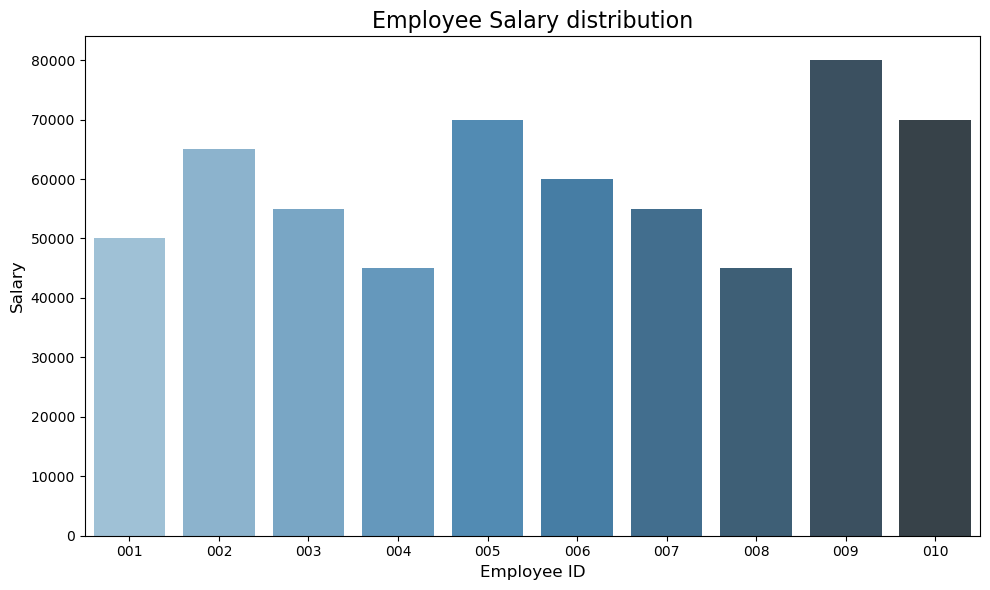

In [17]:
df =  pd.DataFrame({
   'employee_id': ['001', '002', '003', '004', '005', '006', '007',
   '008', '009', '010'],
   'salary': [50000, 65000, 55000, 45000, 70000, 60000, 55000, 45000,
   80000, 70000]
})
# Plot the salary data using seaborn for a simple barplot
plt.figure(figsize=(10,6))
sns.barplot(x='employee_id', y= 'salary', data=df, palette='Blues_d')
# add title and labels
plt.title('Employee Salary distribution', fontsize=16)
plt.xlabel('Employee ID',fontsize=12)
plt.ylabel('Salary', fontsize=12)

# show the plot
plt.tight_layout()
plt.show()


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


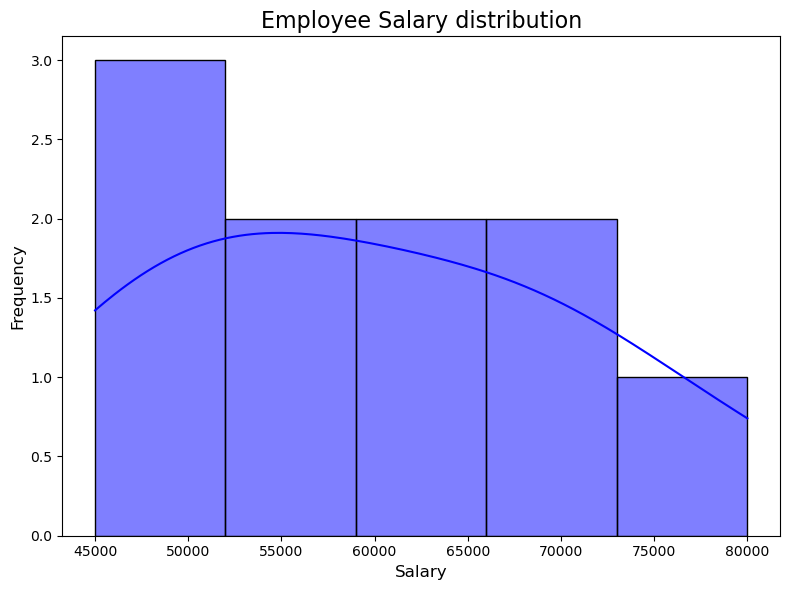

In [19]:
# Plot a histogram of the salary distribution using seaborn
plt.figure(figsize=(8,6))
sns.histplot(df['salary'], bins=5, kde=True, color='blue')

# add titles and labels
plt.title('Employee Salary distribution', fontsize=16)
plt.xlabel('Salary',fontsize=12)
plt.ylabel('Frequency', fontsize=12)
# show the plot
plt.tight_layout()
plt.show()

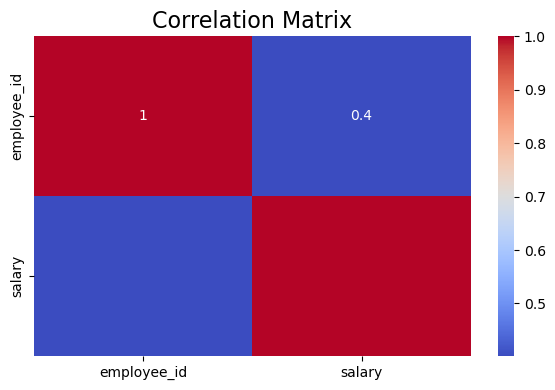

In [21]:
# Calculate the correlation matrix
corr_matrix= df.corr()
# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(6,4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm',cbar=True)
# add title
plt.title('Correlation Matrix', fontsize=16)

# show the plot
plt.tight_layout()
plt.show()

# Statistics

In [5]:
data = np.array([1,2,3,4,5,6])
df = pd.DataFrame(data,columns=['Values'])
df.describe()

,Values
count,6.000000
mean,3.500000
std,1.870829
min,1.000000
25%,2.250000
50%,3.500000
75%,4.750000
max,6.000000


In [22]:
## mean, median, mode
df =  pd.DataFrame({
   'employee_id': ['001', '002', '003', '004', '005', '006', '007',
   '008', '009', '010'],
   'salary': [50000, 65000, 55000, 45000, 70000, 60000, 55000, 45000,
   80000, 70000]
})
df
mean_salary = np.mean(df['salary'])
print('mean salary',mean_salary)
median_salary = np.median(df['salary'])
print('median_salary',median_salary)
mode_salary = (df['salary']).mode()[0]
print('mode_salary',mode_salary)
df

mean salary 59500.0
median_salary 57500.0
mode_salary 45000


,employee_id,salary
0,001,50000
1,002,65000
2,003,55000
3,004,45000
4,005,70000
5,006,60000
6,007,55000
7,008,45000
8,009,80000
9,010,70000


# Regression Analysis

In [7]:
## simple linear regression (single independent variable is used to predict the dependent variable)
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
diabetes_data = load_diabetes()
x = diabetes_data.data[:,2] # [:,2] from the all rows (:) selecting the third columns (index=2)
y = diabetes_data.target
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)
# reshape the input data (it converts a 1D array into a 2D array with a single column.)
x_train = x_train.reshape(-1,1)
x_test = x_test.reshape(-1,1)
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [15]:
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test,y_pred)
print('mse',mse)
print('Coefficient of Determination:',r2)

mse 4061.8259284949268
Coefficient of Determination: 0.23335039815872138


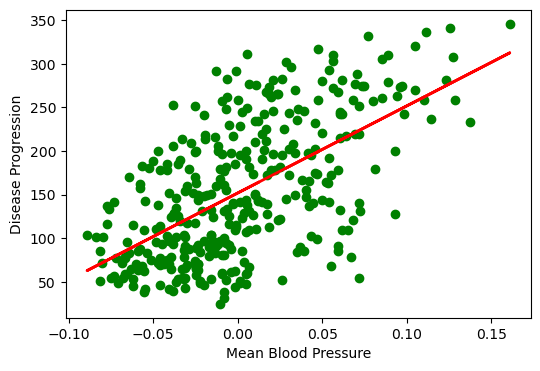

In [19]:
# plot the training data
plt.figure(figsize=(6,4))
plt.scatter(x_train,y_train,color='green')
# plot the regression line
plt.plot(x_train, model.predict(x_train), color='red', linewidth=2)
# add axis lebels
plt.xlabel('Mean Blood Pressure')
plt.ylabel('Disease Progression')
# show the plot
plt.show()

In [41]:
# multiple linear regression (it uses multiple independent variable or data to predict the dependent variable or data)
from sklearn.datasets import load_diabetes
diabetes_data = load_diabetes()
x = diabetes_data.data
y = diabetes_data.target
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)
model = LinearRegression()
model.fit(x_train,y_train)



LinearRegression()

In [42]:
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
score = model.score(x_test,y_test)
print('mse',mse)
print('Coefficient of Determination',r2)
print('accuracy',score*100)


mse 2900.193628493482
Coefficient of Determination 0.4526027629719195
accuracy 45.26027629719195


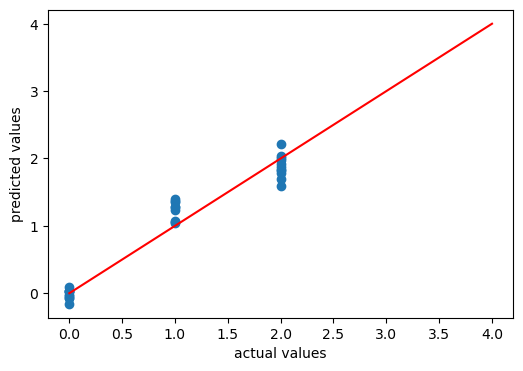

In [36]:
plt.figure(figsize=(6,4))
plt.scatter(y_test,y_pred)
plt.xlabel('actual values')
plt.ylabel('predicted values')
# Add a regression line to the plot
x = np.linspace(0, 4, 4)
y = x
plt.plot(x, y, color='red')

plt.show()

In [40]:
# polynomial regression (combination of simple and multiple regression) 

# Classification Algorithms

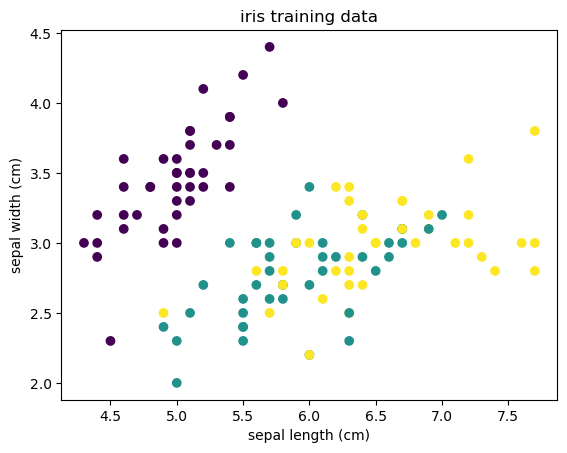

In [1]:
# for categorical data
# logistic regression
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
iris = load_iris()
x = iris.data
y = iris.target
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)
plt.scatter(x_train[:,0],x_train[:,1],c=y_train)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.title('iris training data')
plt.show()


In [3]:
model = LogisticRegression()
model.fit(x_train,y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [4]:
y_pred = model.predict(x_test)
print(accuracy_score(y_test,y_pred))

1.0


In [9]:
# KNeighborsClassifiers
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
iris = load_iris()
x = iris.data
y = iris.target
# split the data
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)
# normalize the data
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)
# train the model
model = KNeighborsClassifier(n_neighbors=5)
model.fit(x_train,y_train)

KNeighborsClassifier()

In [11]:
y_pred = model.predict(x_test)
print(accuracy_score(y_test,y_pred))


0.9666666666666667


In [12]:
# Naive bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
iris = load_iris()
x = iris.data
y = iris.target
# split the data
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)
model = GaussianNB()
model.fit(x_train,y_train)


GaussianNB()

In [13]:
y_pred = model.predict(x_test)
print(accuracy_score(y_test,y_pred))

1.0


In [3]:
# decision tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
iris = load_iris()
x = iris.data
y = iris.target
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)
model = DecisionTreeClassifier()
model.fit(x_train,y_train)


DecisionTreeClassifier()

In [4]:
y_pred = model.predict(x_test)
print(accuracy_score(y_test,y_pred))


1.0


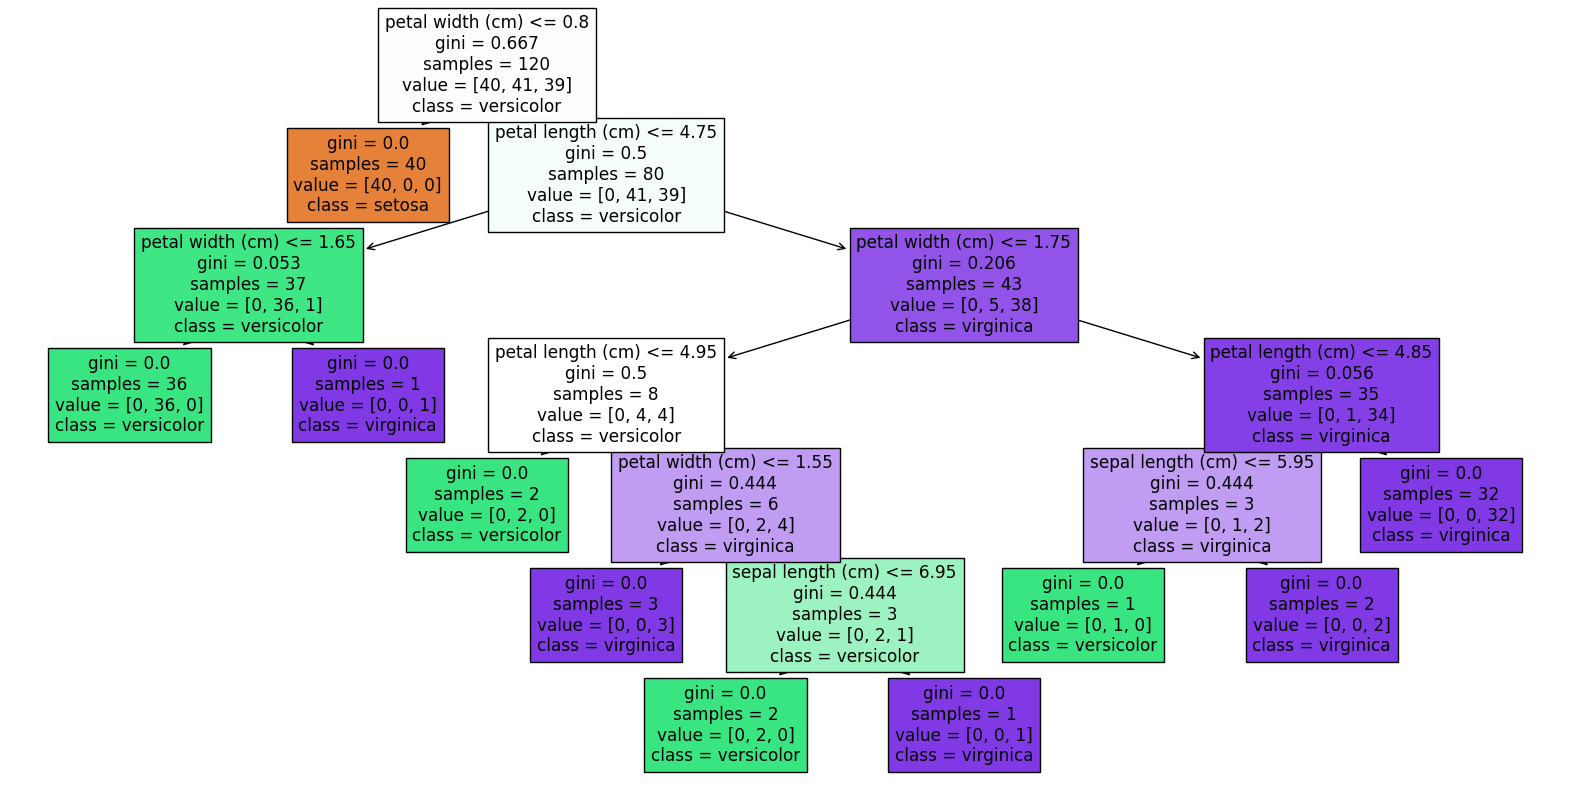

In [5]:
plt.figure(figsize=(20,10))
plot_tree(model,filled=True, feature_names=iris.feature_names,
class_names=iris.target_names)
plt.show()

In [7]:
# SVM
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
iris = load_iris()
x = iris.data
y = iris.target
x_train, x_test, y_train, y_test = train_test_split(x,
y, test_size=0.2, random_state=42)
model = SVC(kernel='linear')
model.fit(x_train,y_train)

SVC(kernel='linear')

In [8]:
model.predict(x_test)
print(accuracy_score(y_test,y_pred))

1.0


In [12]:
# RandomForest
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
iris = load_iris()
# x = iris.iloc[:,:-1] # selecting all rows and all columns except last one 
# y = iris.iloc[:,-1] # selecting all rows and last columns
# this will do the similar things
x = iris.data
y = iris.target
x_train, x_test , y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)
model = RandomForestClassifier(n_estimators=100)
model.fit(x_train,y_train)


RandomForestClassifier()

In [13]:
y_pred = model.predict(x_test)
print(accuracy_score(y_test,y_pred))

1.0


# Clustering Algorithms

C:\Users\USER\AppData\Local\Temp\ipykernel_5428\2786777799.py:7: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x[:,0], x[:,1], s=20, cmap='summer')


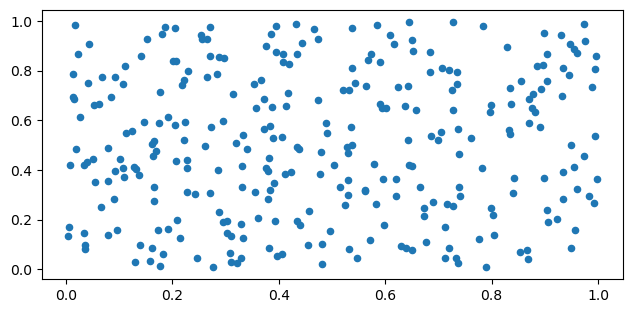

In [15]:
# KMeans
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
x = np.random.rand(300,2)
plt.figure(figsize=(7.5,3.5))
plt.scatter(x[:,0], x[:,1], s=20, cmap='summer')
plt.show()

In [19]:
model = KMeans(n_clusters=3, max_iter=300)
model.fit(x)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans(n_clusters=3)

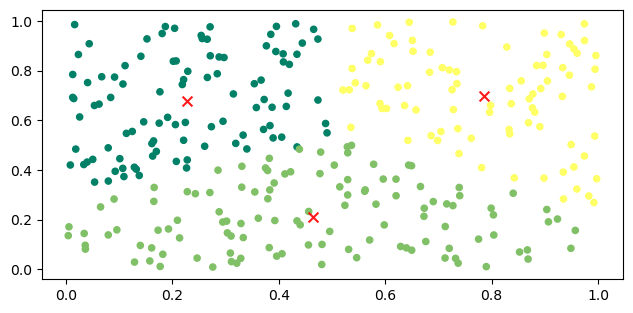

In [21]:
plt.figure(figsize=(7.5,3.5))
plt.scatter(x[:,0], x[:,1], c=model.labels_, s=20, cmap='summer')
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], marker='x', c='r', s=50, alpha=0.9 )
plt.show()

In [7]:
# K-Medoids Clustering
# from sklearn_extra.cluster import KMedoids
# from sklearn.datasets import make_blobs
# import matplotlib.pyplot as plt
# # generate sample data
# x, y = make_blobs(n_samples=500, centers=3, random_state=42 )
# # train the model
# model = KMedoids(n_clusters=3, random_state=42)
# model.fit(x)

In [14]:
# Mean-shift clustering
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import MeanShift, estimate_bandwidth
# generate the data
x = np.random.randn(500,2)
# estimate the bandwidth
bandwidth = estimate_bandwidth(x, quantile=0.1, n_samples=100)
# initial the model
model = MeanShift(bandwidth=bandwidth, bin_seeding=True)
# train the model
model.fit(x)

MeanShift(bandwidth=0.723382345950845, bin_seeding=True)

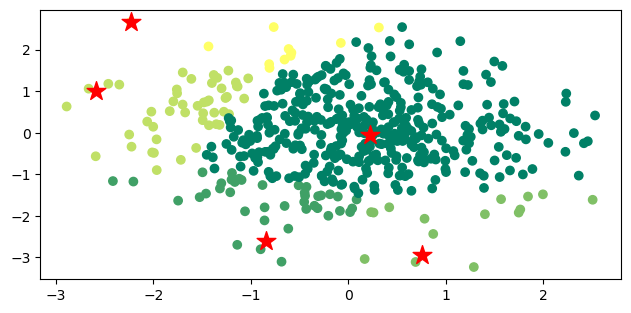

In [20]:
# visualize the data
plt.figure(figsize=(7.5,3.5))
plt.scatter(x[:,0], x[:,1], c=model.labels_, cmap='summer')
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], marker='*', c='r', s=200 )
plt.show()

In [25]:
#  DBSCAN Clustering
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
x, y = make_moons(n_samples=200, noise=0.05, random_state=0)
model = DBSCAN(eps=0.2, min_samples=5)
model.fit(x)

DBSCAN(eps=0.2)

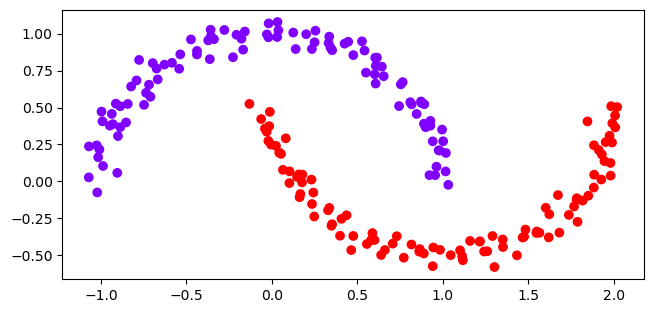

In [26]:
plt.figure(figsize=(7.5,3.5))
plt.scatter(x[:,0], x[:,1], c= model.labels_, cmap='rainbow')
plt.show()

In [32]:
# OPTICS Clustering
from sklearn.datasets import make_blobs
from sklearn.cluster import OPTICS
import matplotlib.pyplot as plt
x, y = make_blobs(n_samples=2000, centers=4, cluster_std=0.60, random_state=0)
model = OPTICS(min_samples=50, xi=0.05)
model.fit(x)

OPTICS(min_samples=50)

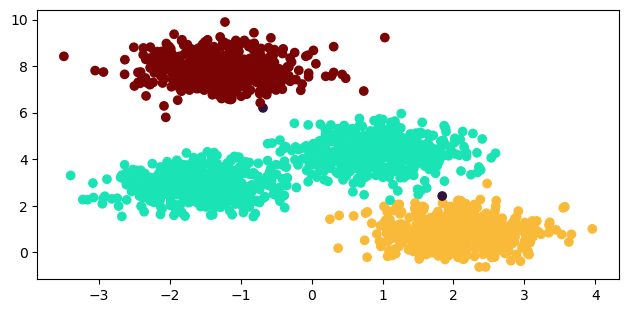

In [37]:
plt.figure(figsize=(7.5,3.5))
plt.scatter(x[:,0], x[:,1], c=model.labels_, cmap='turbo')
plt.show()

#  Miscellaneous

In [5]:
# performance metrics
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
iris = load_iris()
x = iris.data
y = iris.target
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(x_train, y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [13]:
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='macro')
recall = recall_score(y_test, y_pred,average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
print('accuracy', accuracy)
print('precision', precision)
print('recall', recall)
print('f1',f1)

accuracy 1.0
precision 1.0
recall 1.0
f1 1.0


In [17]:
# cross validation
import numpy as np
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
iris = load_iris()
x = iris.data
y = iris.target
model = DecisionTreeClassifier(random_state=42)
# perform k-fold cross-validation
scores = cross_val_score(model, x, y, cv=5)
mean_score = np.mean(scores)
std_score = np.std(scores)
print("Mean cross-validation score:", mean_score)
print("Standard deviation of cross-validation score:", std_score)


Mean cross-validation score: 0.9533333333333334
Standard deviation of cross-validation score: 0.03399346342395189


In [21]:
# grid search
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000, n_features=10, n_classes=2)

model = RandomForestClassifier()
hyperparameters = {'n_estimators': [10, 50, 100], 'max_depth': [None, 5, 10]}

# Define the Grid Search object and fit the data
grid_search = GridSearchCV(model, hyperparameters, scoring='accuracy', cv=5)
grid_search.fit(X, y)

# Print the best hyperparameters and the corresponding score
print("Best hyperparameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best hyperparameters:  {'max_depth': None, 'n_estimators': 100}
Best score:  0.9359999999999999


In [25]:
# data scaling
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
import pandas as pd
iris = load_iris()
x = iris.data
y = iris.target
df = pd.DataFrame(x, columns= iris.feature_names)
# before scalling
print(df.head(3))

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
scaled_df = pd.DataFrame(x_scaled, columns = iris.feature_names)
# after scaled
print(scaled_df.head(3))

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0          -0.900681          1.019004          -1.340227         -1.315444
1          -1.143017         -0.131979          -1.340227         -1.315444
2          -1.385353          0.328414          -1.397064         -1.315444
